In [1]:
# Compare mC fractures across conditions
import sys
from pathlib import Path
from datetime import datetime
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
# import time
# import shap


# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# Import the module or specific functions
# from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
from funcs_extract_mC_profiles_from_BAMs import (
    system_info,
    get_reference_sequence,
    create_output_directory,
    extract_from_bam,
    process_extracted_reads,
    visualize_data,
    create_padded_reads,
    plot_padded_reads,
    save_padded_reads,
    remove_low_methylated_reads,
    process_extracted_reads_no_fully_unmethylated,
    create_padded_reads_no_fully_unmethylated
    # main,
)
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads

modkit found with expected version 0.2.4


In [2]:
def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

# Day 6 post ElectroPoration (EP)
## Unedited D6

In [3]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD490_numRVS644.npy"

CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_unedited_mc07_fracs = get_fractions(CGs_D6_unedited_mc07)
print("CGs_D6_unedited_mc07 shape: ", CGs_D6_unedited_mc07.shape)
print("CGs_D6_unedited_mc07_fracs shape: ", CGs_D6_unedited_mc07_fracs.shape)

Padded reads loaded successfully.
CGs_D6_unedited_mc07 shape:  (1134, 137)
CGs_D6_unedited_mc07_fracs shape:  (137,)


In [4]:
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_unedited_mc0995_fracs = get_fractions(CGs_D6_unedited_mc0995)
print("CGs_D6_unedited_mc0995 shape: ", CGs_D6_unedited_mc0995.shape)
print("CGs_D6_unedited_mc0995_fracs shape: ", CGs_D6_unedited_mc0995_fracs.shape)   


Padded reads loaded successfully.
CGs_D6_unedited_mc0995 shape:  (1127, 137)
CGs_D6_unedited_mc0995_fracs shape:  (137,)



## CRISPRoff Day 6 

In [5]:
save_padded_reads_name_np =  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD802_numRVS1480.npy"
CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc07_fracs = get_fractions(CGs_D6_CRoff_mc07)
print("CGs_D6_CRoff_mc07 shape: ", CGs_D6_CRoff_mc07.shape)
print("CGs_D6_CRoff_mc07_fracs shape: ", CGs_D6_CRoff_mc07_fracs.shape)


save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/" +\
     'CG_137_padded_reads_day6_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD793_numRVS1449.npy'
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy"
CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc0995_fracs = get_fractions(CGs_D6_CRoff_mc0995)
print("CGs_D6_CRoff_mc0995 shape: ", CGs_D6_CRoff_mc0995.shape)
print("CGs_D6_CRoff_mc0995_fracs shape: ", CGs_D6_CRoff_mc0995_fracs.shape)     

Padded reads loaded successfully.
CGs_D6_CRoff_mc07 shape:  (2282, 137)
CGs_D6_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_CRoff_mc0995 shape:  (2242, 137)
CGs_D6_CRoff_mc0995_fracs shape:  (137,)


# Day 28: 
Unedited Cells 


In [6]:
# Day 28 post EP
## Unedited Cells 
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS17.npy"
CGs_D28_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_unedited_mc07_fracs = get_fractions(CGs_D28_unedited_mc07)
print("CGs_D28_unedited_mc07 shape: ", CGs_D28_unedited_mc07.shape)
print("CGs_D28_unedited_mc07_fracs shape: ", CGs_D28_unedited_mc07_fracs.shape)  

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS18.npy"
CGs_D28_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_unedited_mc0995_fracs = get_fractions(CGs_D28_unedited_mc0995)
print("CGs_D28_unedited_mc0995 shape: ", CGs_D28_unedited_mc0995.shape)
print("CGs_D28_unedited_mc0995_fracs shape: ", CGs_D28_unedited_mc0995_fracs.shape) 

Padded reads loaded successfully.
CGs_D28_unedited_mc07 shape:  (23, 137)
CGs_D28_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D28_unedited_mc0995 shape:  (24, 137)
CGs_D28_unedited_mc0995_fracs shape:  (137,)


CRoff day 28

In [7]:
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
CGs_D28_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D28_CRoff_mc07_fracs = get_fractions(CGs_D28_CRoff_mc07)
print('CGs_D28_CRoff_mc07 shape: ', CGs_D28_CRoff_mc07.shape) 
print("CGs_D28_CRoff_mc07_fracs shape: ", CGs_D28_CRoff_mc07_fracs.shape)

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD6_numRVS6.npy"
CGs_D28_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D28_CRoff_mc0995_fracs = get_fractions(CGs_D28_CRoff_mc0995)
print("CGs_D28_CRoff_mc0995 shape: ", CGs_D28_CRoff_mc0995.shape)
print("CGs_D28_CRoff_mc0995_fracs shape: ", CGs_D28_CRoff_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D28_CRoff_mc07 shape:  (12, 137)
CGs_D28_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D28_CRoff_mc0995 shape:  (12, 137)
CGs_D28_CRoff_mc0995_fracs shape:  (137,)


# Day 35: CROff

In [19]:
# Day 35
folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/croff/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_D35_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc07_fracs = get_fractions(CGs_D35_CRoff_mc07)
print("CGs_D35_CRoff_mc07 shape", CGs_D35_CRoff_mc07.shape)
print("CGs_D35_CRoff_mc07_fracs shape: ", CGs_D35_CRoff_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_D35_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_CRoff_mc0995_fracs = get_fractions(CGs_D35_CRoff_mc0995)
print("CGs_D35_CRoff_mc0995 shape:", CGs_D35_CRoff_mc0995.shape)
print("CGs_D35_CRoff_mc0995_fracs shape: ", CGs_D35_CRoff_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D35_CRoff_mc07 shape (326, 137)
CGs_D35_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D35_CRoff_mc0995 shape: (326, 137)
CGs_D35_CRoff_mc0995_fracs shape:  (137,)


Day 35: unedited; 37hours sequenced

In [21]:
folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/part1_37h_sequenced/dimelo_v2_output/"


save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS115.npy"
CGs_D35_unedited_mc07_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc07_frac_lib1 = get_fractions(CGs_D35_unedited_mc07_lib1)
print("CGs_D35_unedited_mc07_lib1 shape:", CGs_D35_unedited_mc07_lib1.shape)
print("CGs_D35_unedited_mc07_fracs_lib1 shape: ", CGs_D35_unedited_mc07_frac_lib1.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS114.npy"
CGs_D35_unedited_mc0995_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc0995_fracs_lib1 = get_fractions(CGs_D35_unedited_mc0995_lib1)
print("CGs_D35_unedited_mc0995_lib1 shape:", CGs_D35_unedited_mc0995_lib1.shape)
print("CGs_D35_unedited_mc0995_fracs_lib1 shape: ", CGs_D35_unedited_mc0995_fracs_lib1.shape)   

Padded reads loaded successfully.
CGs_D35_unedited_mc07_lib1 shape: (201, 137)
CGs_D35_unedited_mc07_fracs_lib1 shape:  (137,)
Padded reads loaded successfully.
CGs_D35_unedited_mc0995_lib1 shape: (200, 137)
CGs_D35_unedited_mc0995_fracs_lib1 shape:  (137,)


In [ ]:
# folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/reloaded_library/dimelo_v2_output/"


# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_REloadedLibrary_MT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD0_numRVS1.npy"
# CGs_D35_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc07_fracs = get_fractions(CGs_D35_unedited_mc07)
# print("CGs_D35_unedited_mc07 shape:", CGs_D35_unedited_mc07.shape)
# print("CGs_D35_unedited_mc07_fracs shape: ", CGs_D35_unedited_mc07_fracs.shape)   

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_REloadedLibrary_MT_Tcells_mC0.9_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.9_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD0_numRVS1.npy"
# CGs_D35_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D35_unedited_mc0995_fracs = get_fractions(CGs_D35_unedited_mc0995)
# print("CGs_D35_unedited_mc0995 shape:", CGs_D35_unedited_mc0995.shape)
# print("CGs_D35_unedited_mc0995_fracs shape: ", CGs_D35_unedited_mc0995_fracs.shape)   

In [24]:
folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/merged_2libraries/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS115.npy"
CGs_D35_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc07_fracs = get_fractions(CGs_D35_unedited_mc07)
print("CGs_D35_unedited_mc07 shape:", CGs_D35_unedited_mc07.shape)
print("CGs_D35_unedited_mc07_fracs shape: ", CGs_D35_unedited_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
CGs_D35_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D35_unedited_mc0995_fracs = get_fractions(CGs_D35_unedited_mc0995)
print("CGs_D35_unedited_mc0995 shape:", CGs_D35_unedited_mc0995.shape)
print("CGs_D35_unedited_mc0995_fracs shape: ", CGs_D35_unedited_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_D35_unedited_mc07 shape: (202, 137)
CGs_D35_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D35_unedited_mc0995 shape: (201, 137)
CGs_D35_unedited_mc0995_fracs shape:  (137,)


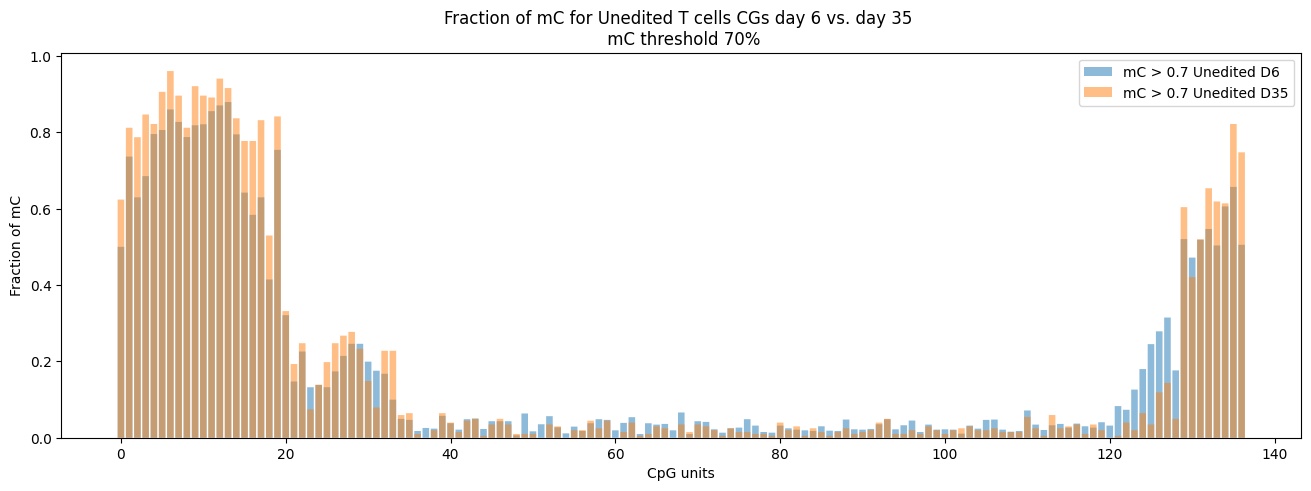

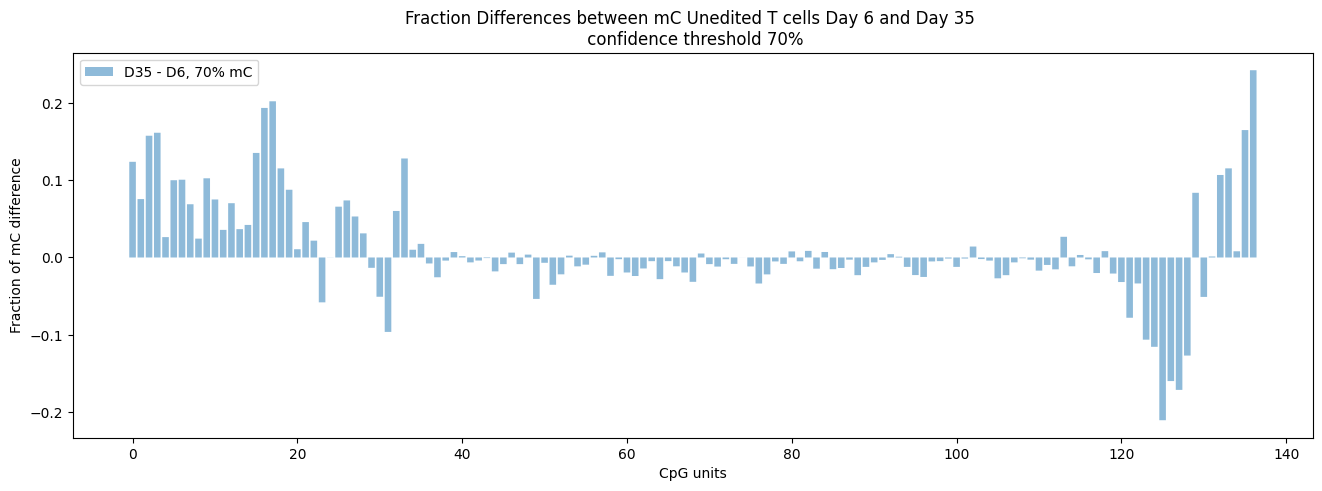

In [46]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D6')
plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_07 =   CGs_D35_unedited_mc07_fracs  - CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07)), dif_D35_D6_mCthresh_07, snap=False, alpha=0.5, label='D35 - D6, 70% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

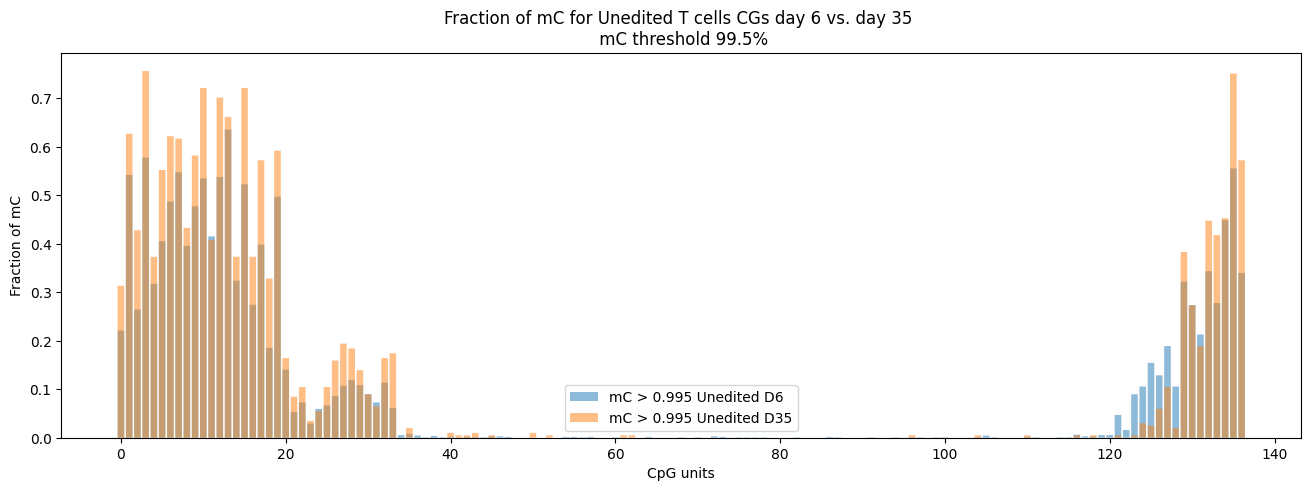

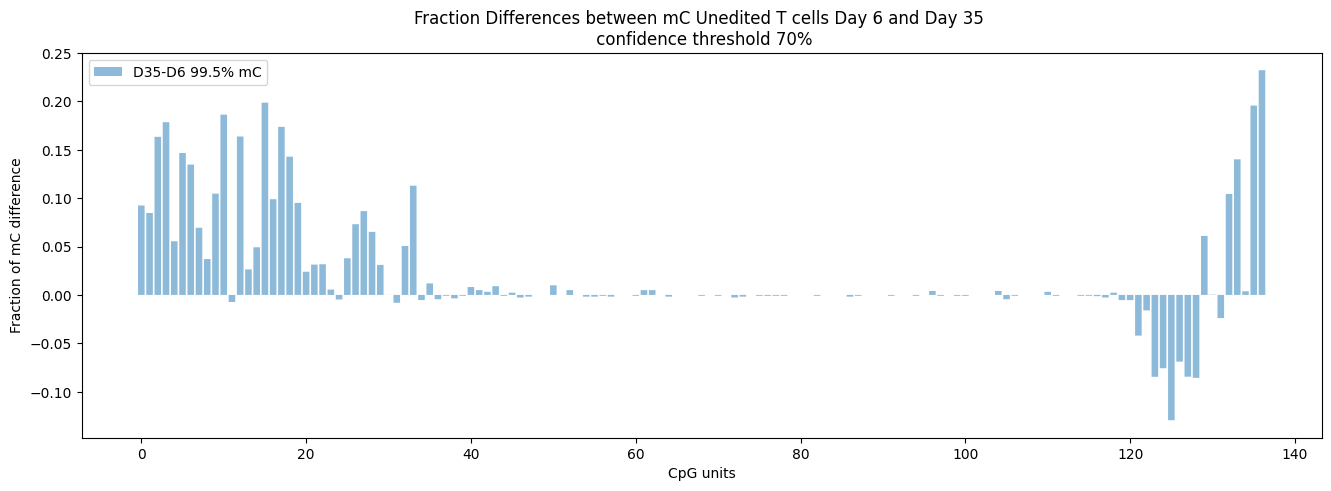

In [47]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D6')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

# Normilize by deviding per position

In [50]:
# dif_D35_D6_mCthresh_0995

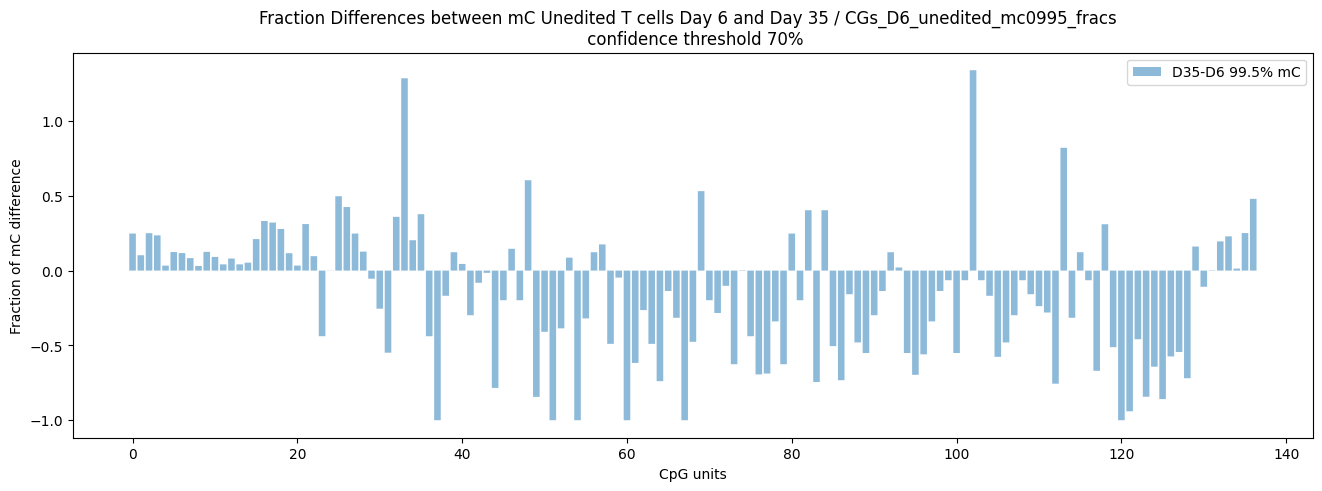

/tmp/ipykernel_3595699/662311908.py:15: RuntimeWarning:

divide by zero encountered in divide



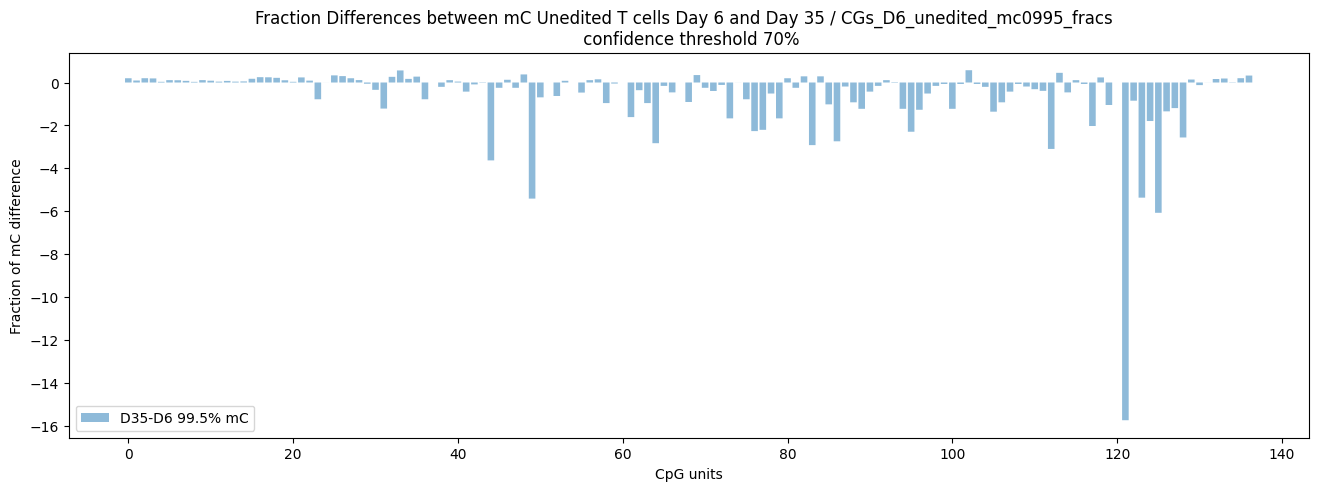

In [49]:
dif_D35_D6_mCthresh_07_byD35 = dif_D35_D6_mCthresh_07/CGs_D6_unedited_mc07_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07_byD35)), dif_D35_D6_mCthresh_07_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

dif_D35_D6_mCthresh_07_byD35 = dif_D35_D6_mCthresh_07/CGs_D35_unedited_mc07_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_07_byD35)), dif_D35_D6_mCthresh_07_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

/tmp/ipykernel_3595699/220525511.py:1: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_3595699/220525511.py:1: RuntimeWarning:

invalid value encountered in divide



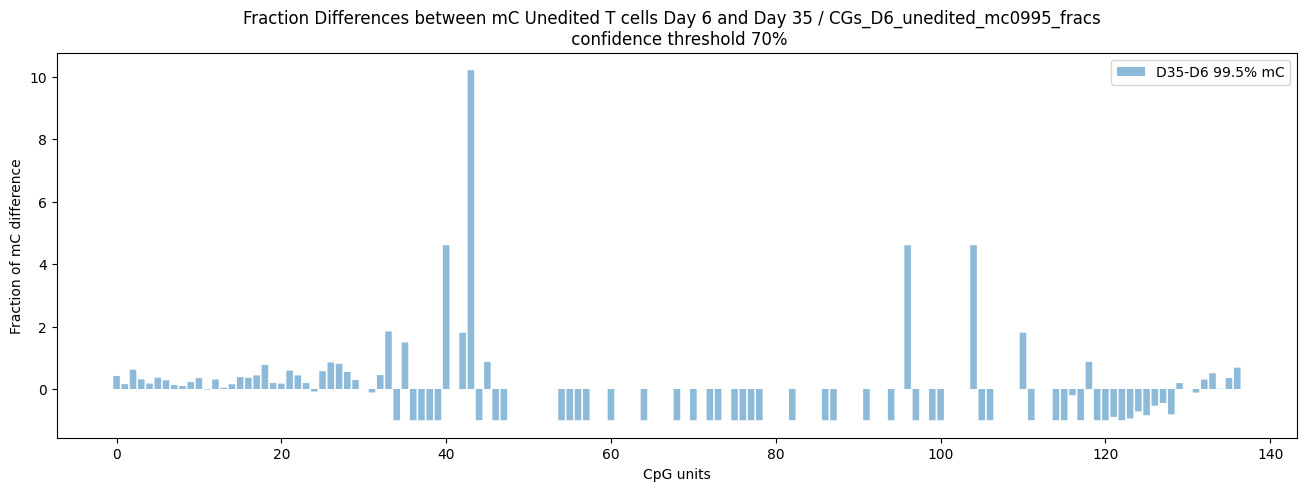

/tmp/ipykernel_3595699/220525511.py:15: RuntimeWarning:

divide by zero encountered in divide

/tmp/ipykernel_3595699/220525511.py:15: RuntimeWarning:

invalid value encountered in divide



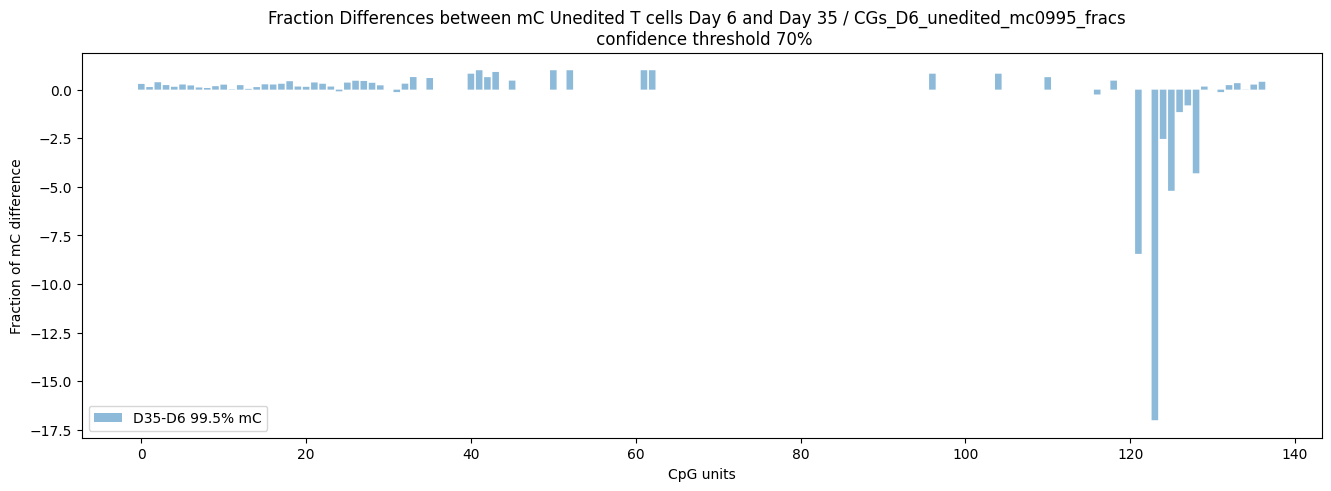

In [44]:
dif_D35_D6_mCthresh_0995_byD35 = dif_D35_D6_mCthresh_0995/CGs_D6_unedited_mc0995_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995_byD35)), dif_D35_D6_mCthresh_0995_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

dif_D35_D6_mCthresh_0995_byD35 = dif_D35_D6_mCthresh_0995/CGs_D35_unedited_mc0995_fracs 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995_byD35)), dif_D35_D6_mCthresh_0995_byD35, snap=False, alpha=0.5, label='D35-D6 99.5% mC' )


# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 / CGs_D6_unedited_mc0995_fracs  \n confidence threshold 70%')
plt.legend()
# Show the plot
plt.show()

# Day 28 vs. 35

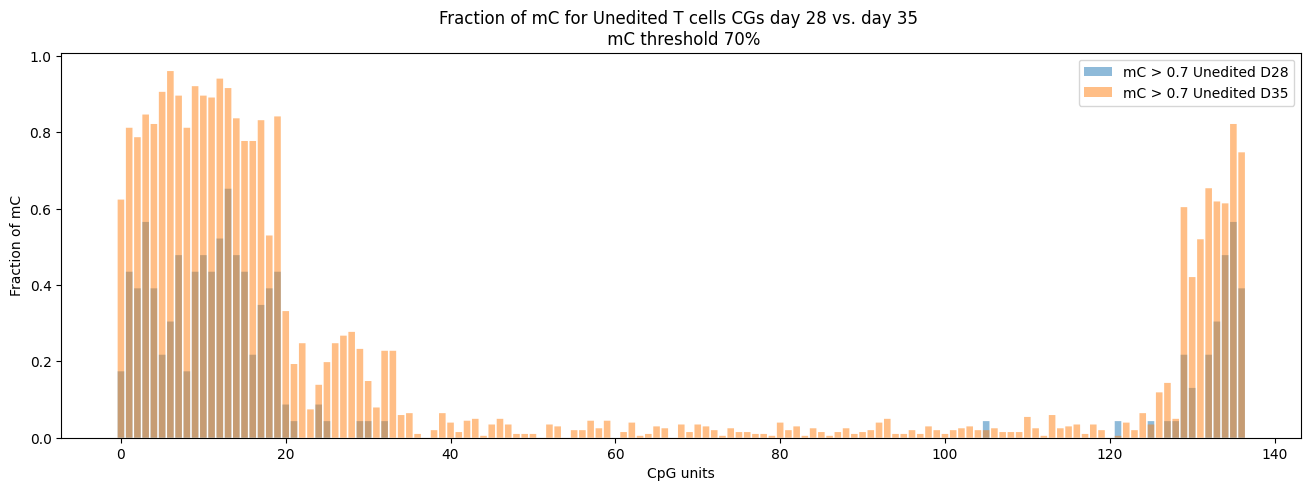

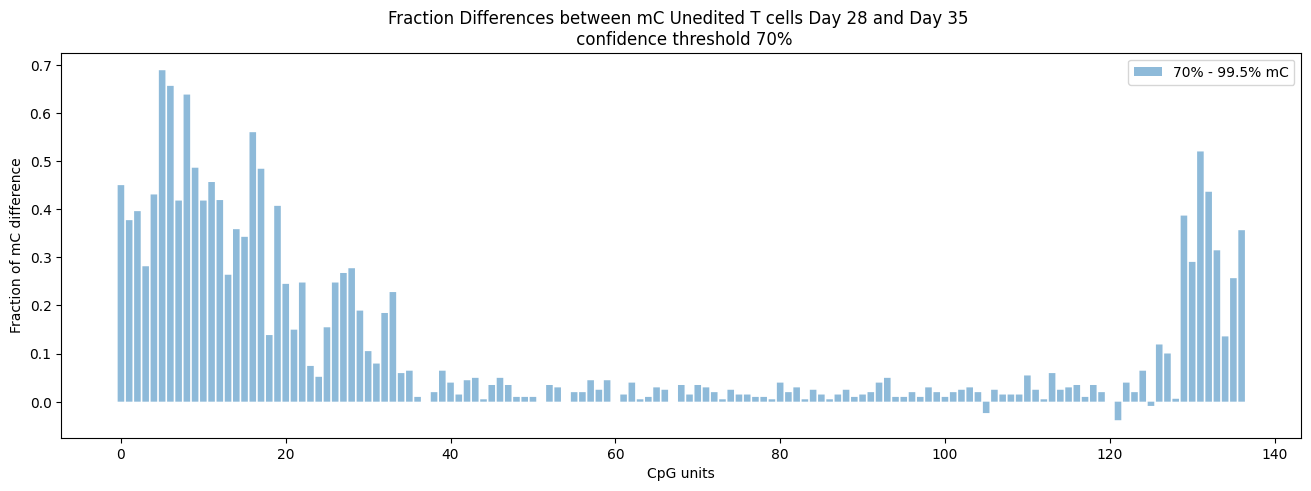

In [26]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_unedited_mc07_fracs)), CGs_D28_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D28')
plt.bar(np.arange(len(CGs_D35_unedited_mc07_fracs)), CGs_D35_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 vs. day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D28_mCthresh_70 =   CGs_D35_unedited_mc07_fracs  - CGs_D28_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D28_mCthresh_70)), dif_D35_D28_mCthresh_70, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 28 and Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

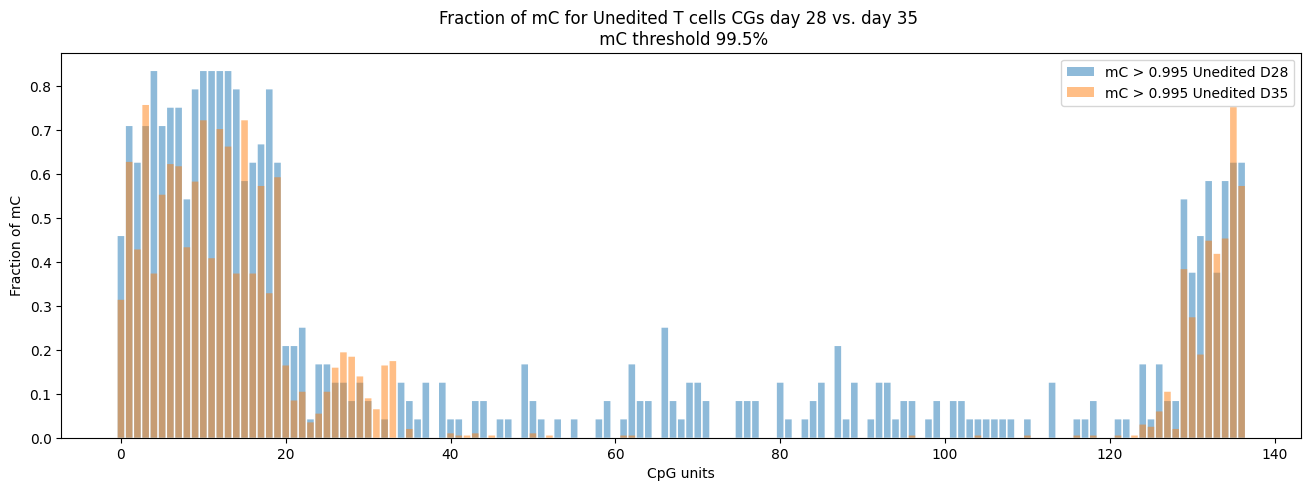

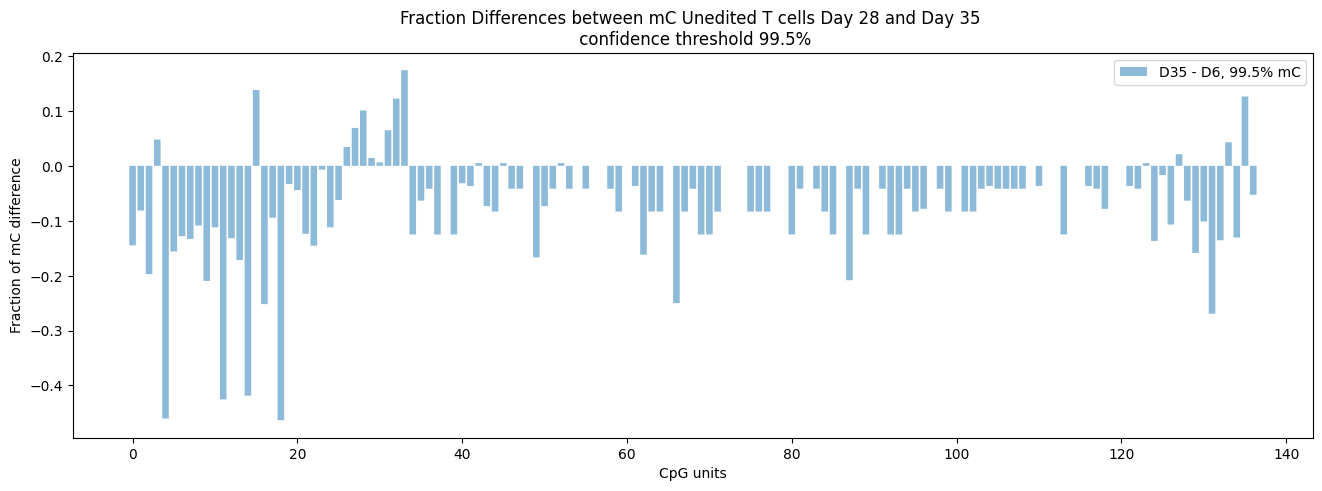

In [27]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D28_unedited_mc0995_fracs)), CGs_D28_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D28')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 28 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D28_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D28_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D28_mCthresh_0995)), dif_D35_D28_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 28 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

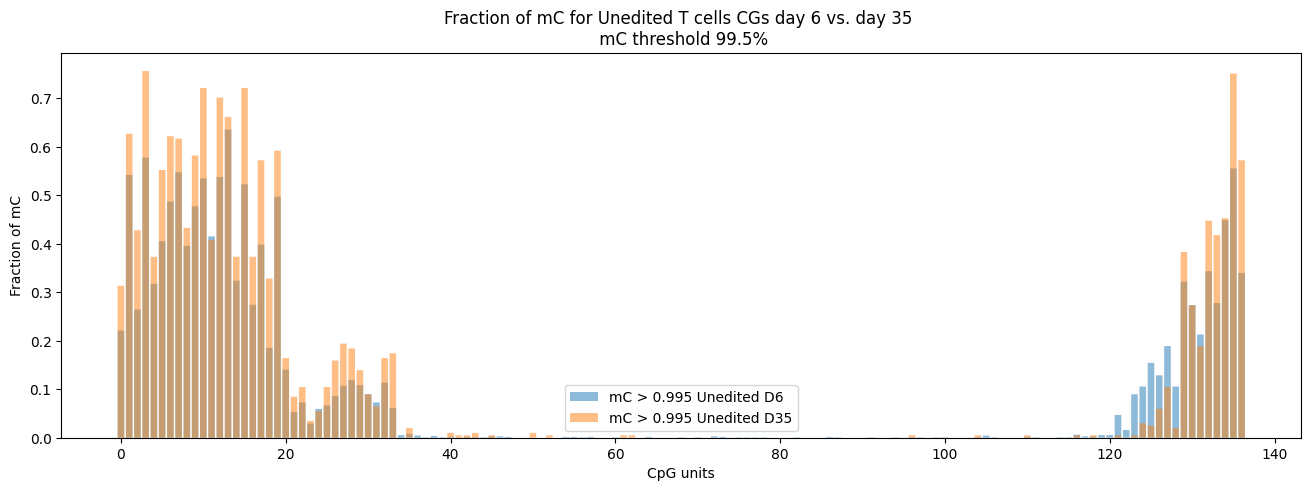

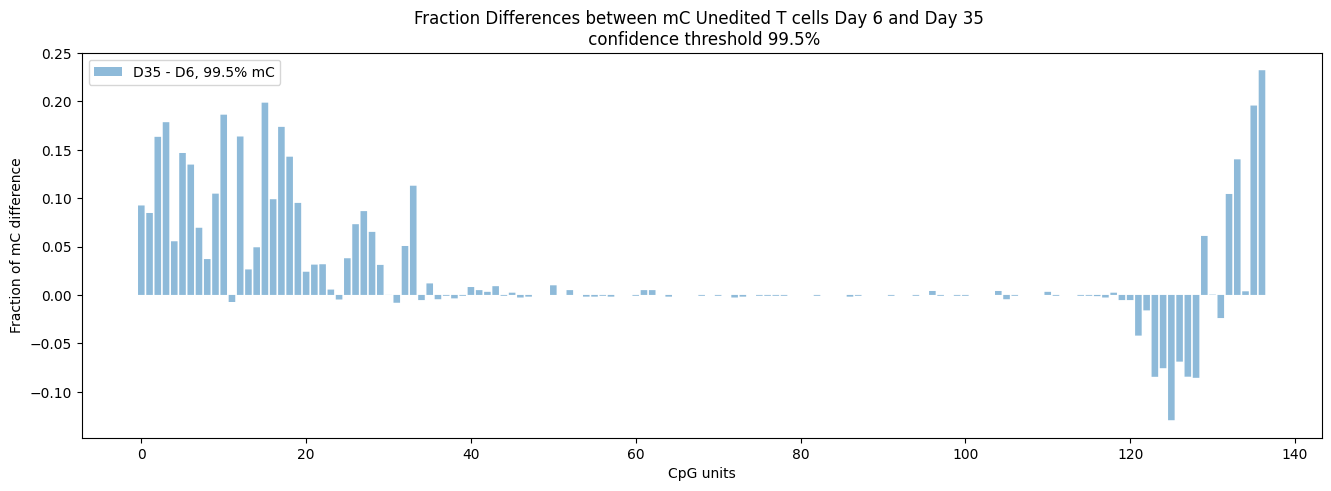

In [28]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D6')
plt.bar(np.arange(len(CGs_D35_unedited_mc0995_fracs)), CGs_D35_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited D35')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 6 vs. day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_D6_mCthresh_0995 =   CGs_D35_unedited_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_D6_mCthresh_0995)), dif_D35_D6_mCthresh_0995, snap=False, alpha=0.5, label='D35 - D6, 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 and Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

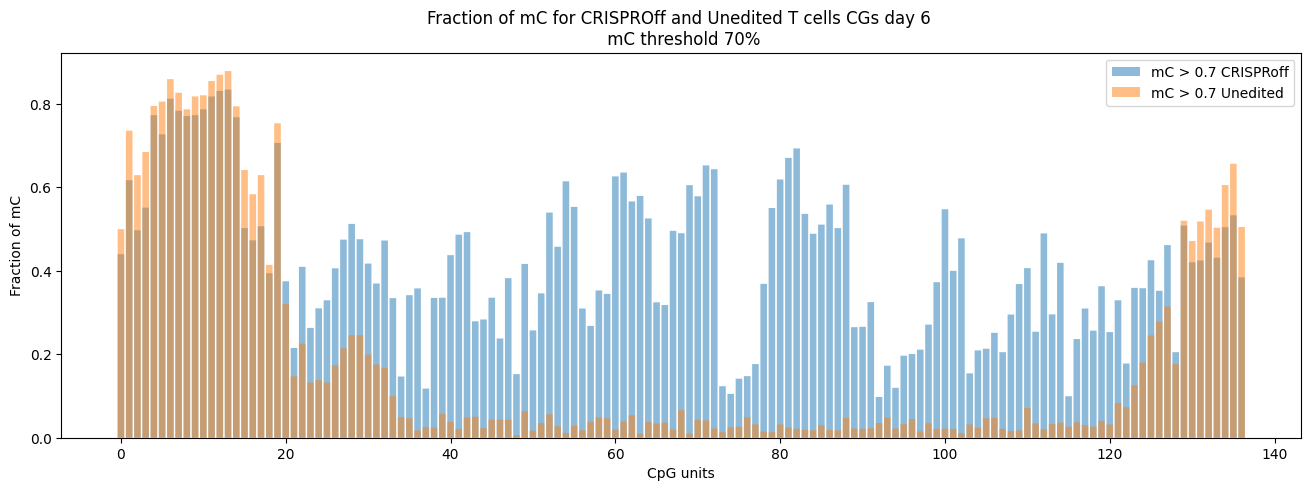

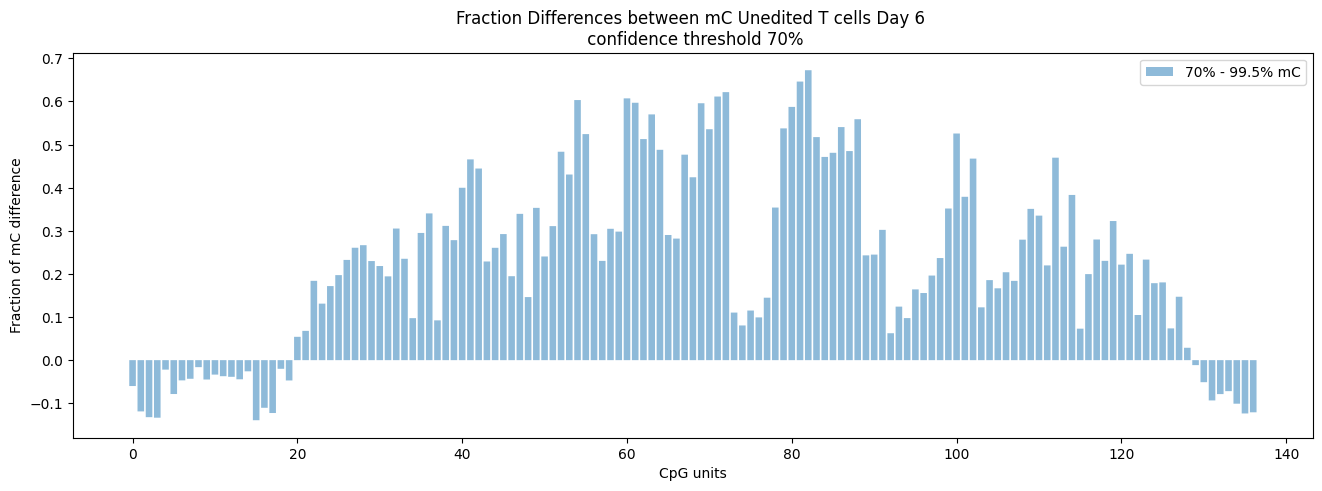

In [29]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_mc07_fracs)), CGs_D6_unedited_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7 Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_70 =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_unedited_mc07_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_70)), dif_D6_mCthresh_70, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()

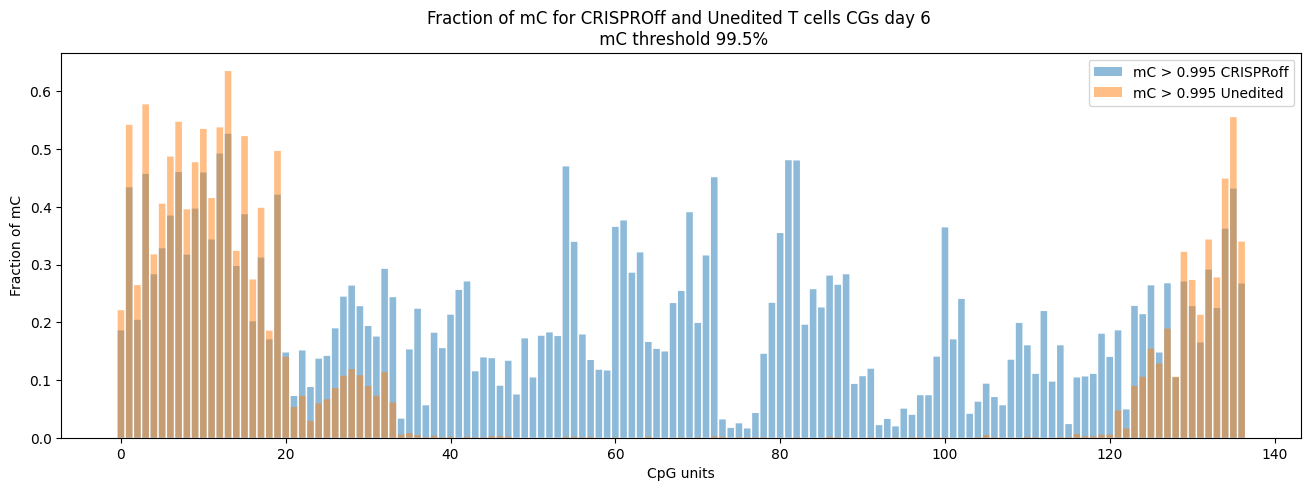

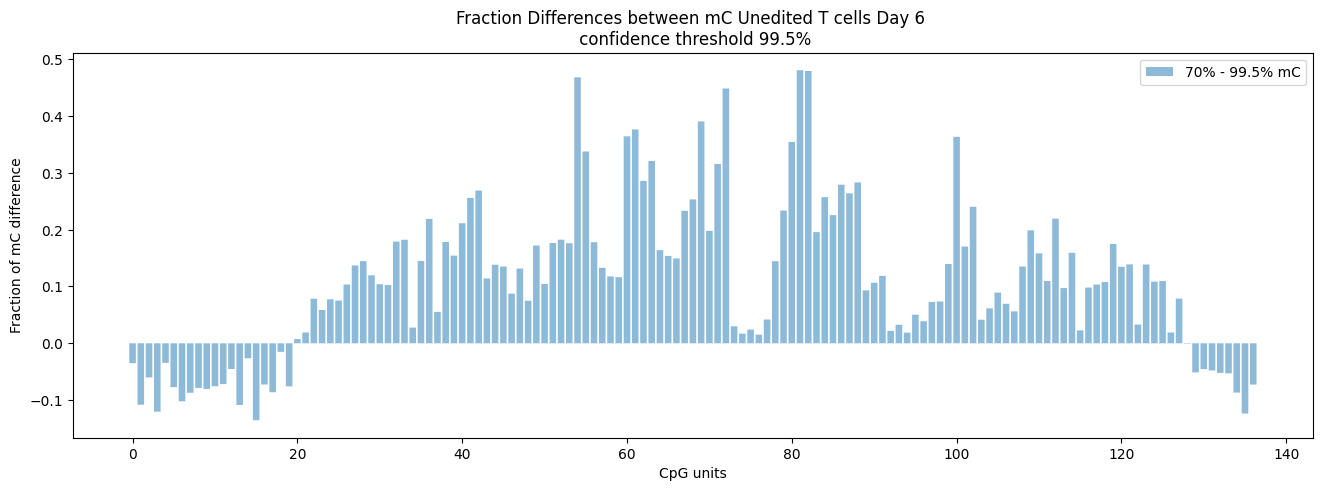

In [30]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff')
plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   CGs_D6_CRoff_mc0995_fracs  - CGs_D6_unedited_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

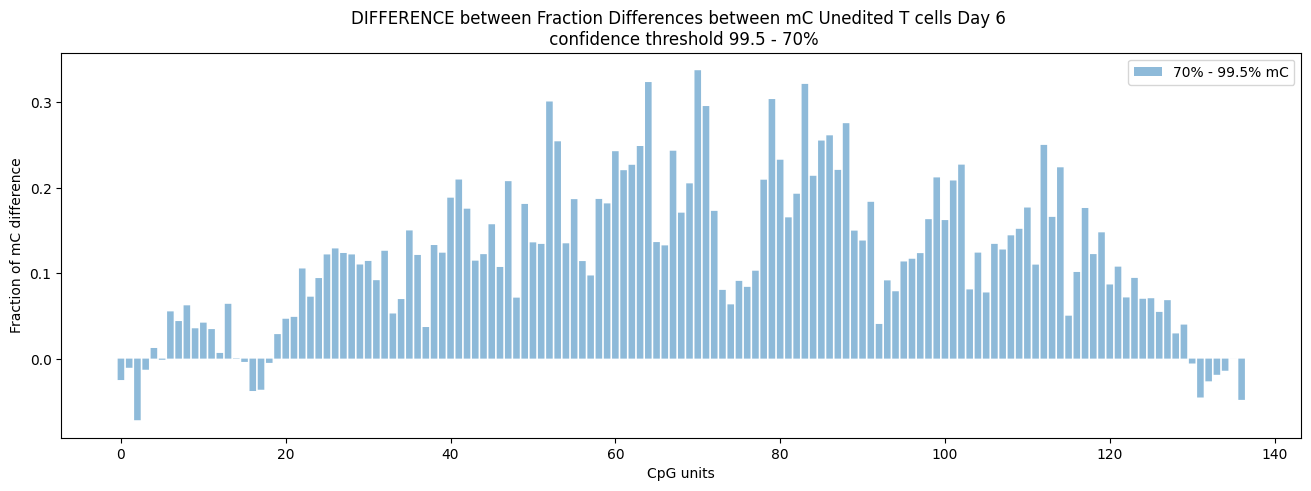

In [31]:

# DIFFERENCES DIFFERENCE! 

dif_dif_D6_mCthresh_70_995 =  dif_D6_mCthresh_70 - dif_D6_mCthresh_995 

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_dif_D6_mCthresh_70_995)), dif_dif_D6_mCthresh_70_995, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('DIFFERENCE between Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5 - 70%')
plt.legend()

# Show the plot
plt.show()

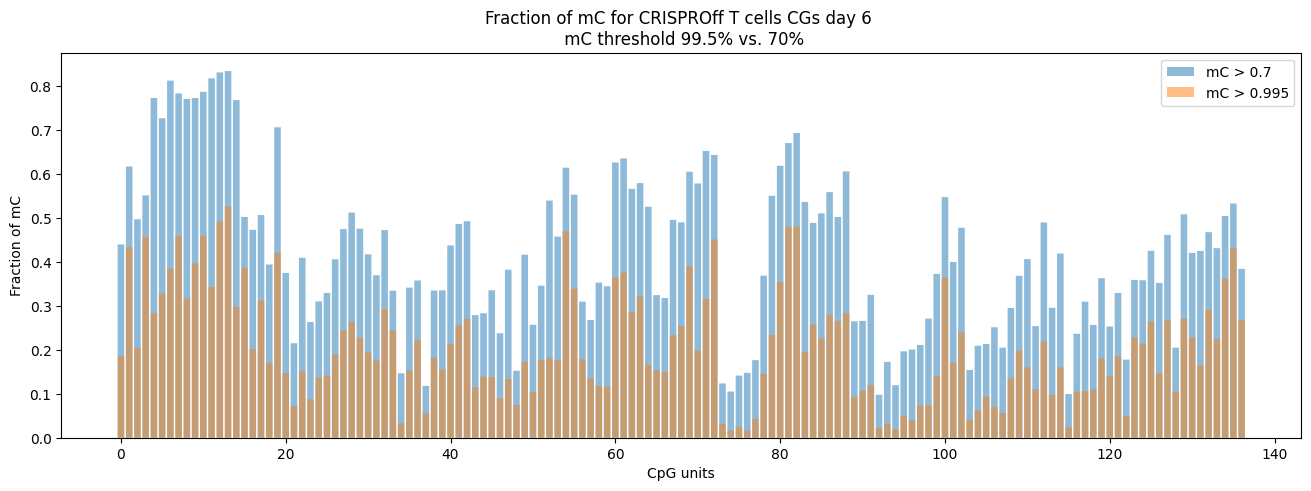

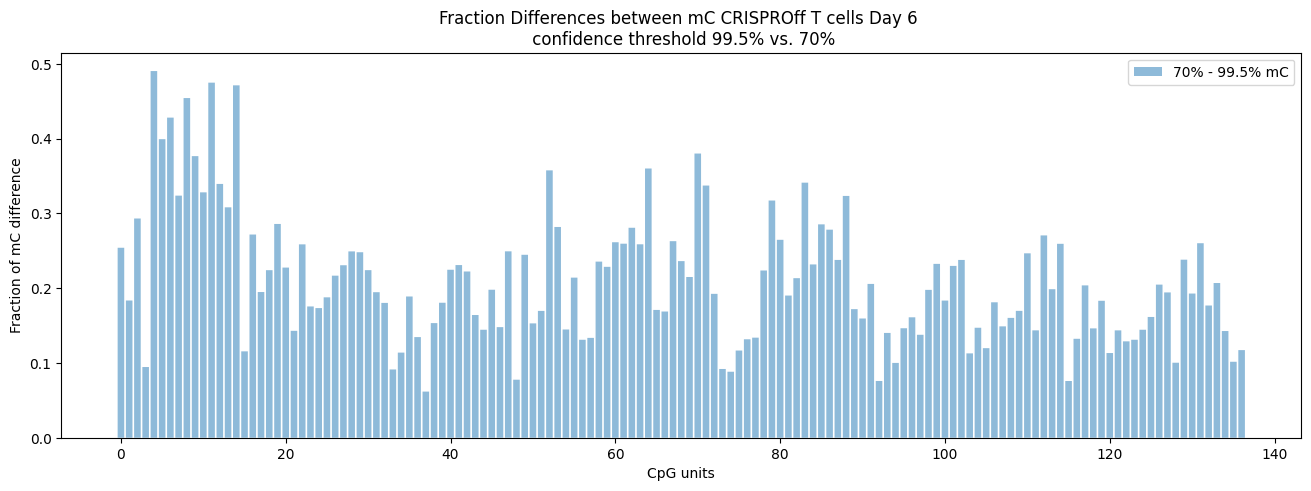

In [32]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D6_CRoff_mc07_fracs)), CGs_D6_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7')
plt.bar(np.arange(len(CGs_D6_CRoff_mc0995_fracs)), CGs_D6_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff T cells CGs day 6 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_CRoff_mCthresh =   CGs_D6_CRoff_mc07_fracs  - CGs_D6_CRoff_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_CRoff_mCthresh)), dif_D6_CRoff_mCthresh, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPROff T cells Day 6 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

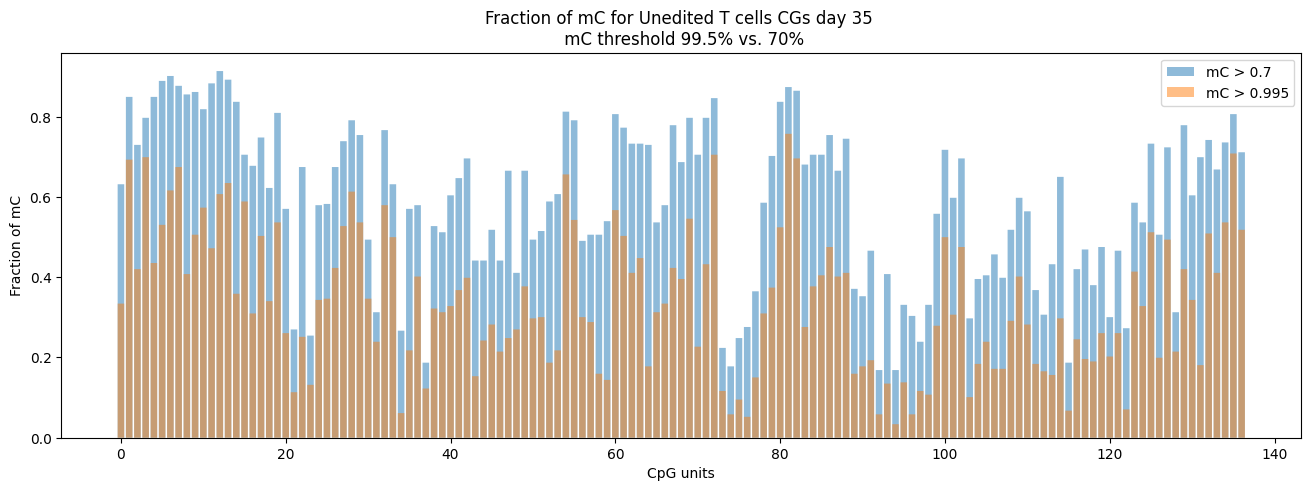

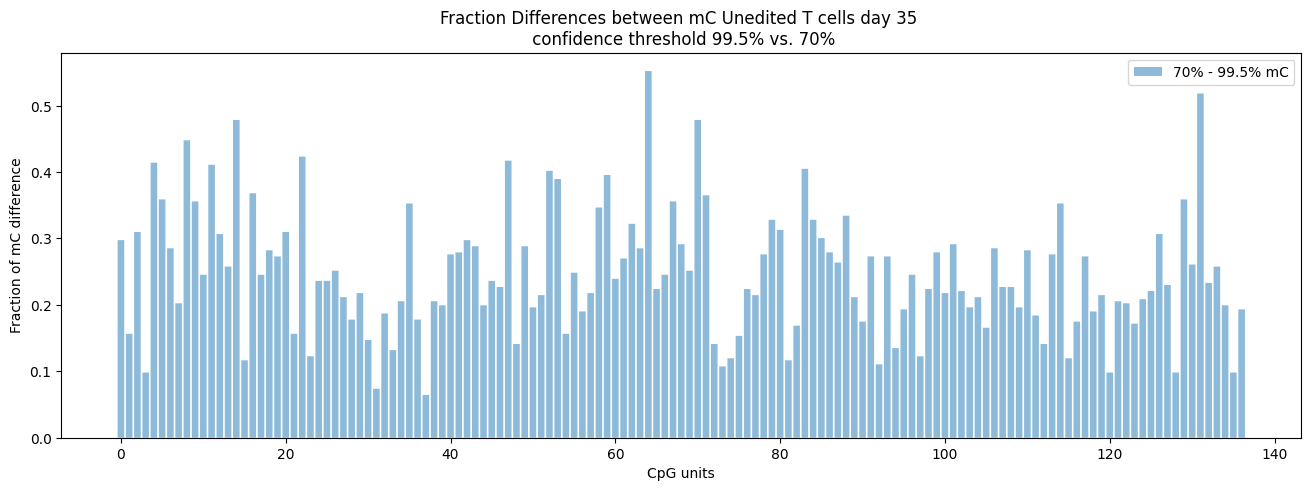

In [33]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7')
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 35 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_CRoff_mCthresh =   CGs_D35_CRoff_mc07_fracs  - CGs_D35_CRoff_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_CRoff_mCthresh)), dif_D35_CRoff_mCthresh, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

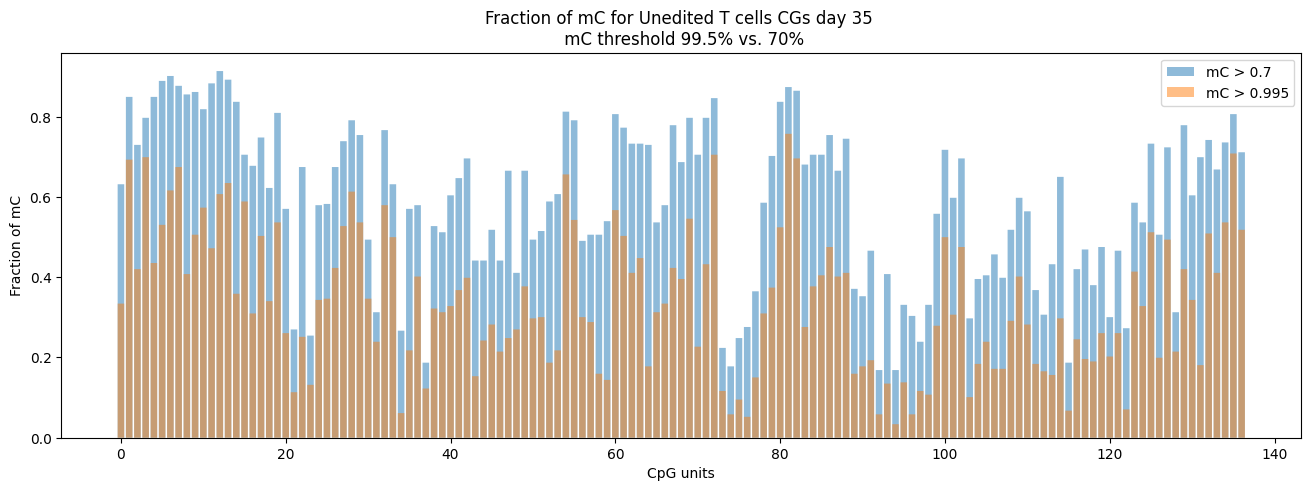

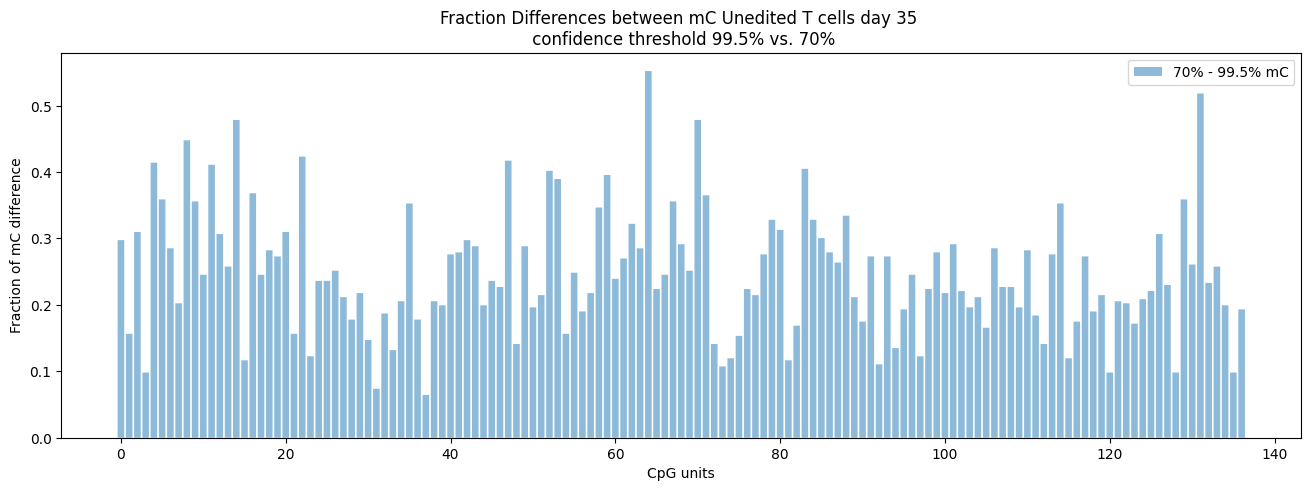

In [ ]:
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_mc07_fracs)), CGs_D35_CRoff_mc07_fracs, snap=False, alpha=0.5, label='mC > 0.7')
plt.bar(np.arange(len(CGs_D35_CRoff_mc0995_fracs)), CGs_D35_CRoff_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for Unedited T cells CGs day 35 \n mC threshold 99.5% vs. 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D35_CRoff_mCthresh =   CGs_D35_CRoff_mc07_fracs  - CGs_D35_CRoff_mc0995_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D35_CRoff_mCthresh)), dif_D35_CRoff_mCthresh, snap=False, alpha=0.5, label='70% - 99.5% mC' )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

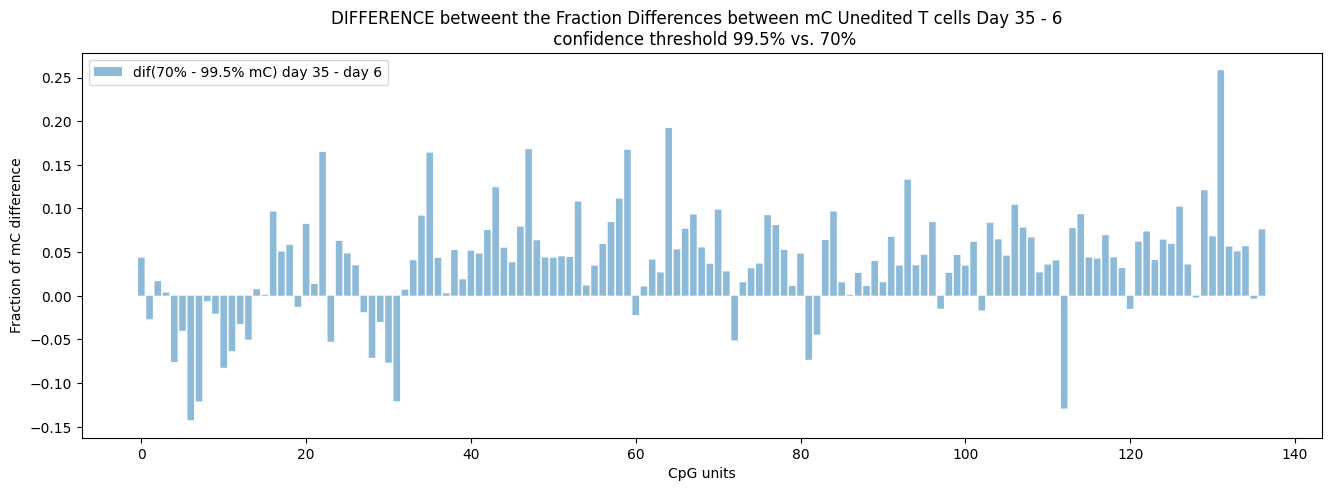

In [35]:

# DIFFERENCES

dif_dif_D6_D35_CRoff_mCthresh = dif_D35_CRoff_mCthresh - dif_D6_CRoff_mCthresh

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_dif_D6_D35_CRoff_mCthresh)), dif_dif_D6_D35_CRoff_mCthresh, snap=False, alpha=0.5, label='dif(70% - 99.5% mC) day 35 - day 6')

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('DIFFERENCE betweent the Fraction Differences between mC Unedited T cells Day 35 - 6  \n confidence threshold 99.5% vs. 70%')
plt.legend()

# Show the plot
plt.show()

In [37]:

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_07_frac)), CGs_D35_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D28_CRoff_07_frac)), CGs_D28_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 28')
plt.bar(np.arange(len(CGs_D6_CRoff_07_frac)), CGs_D6_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6, 28 vs. Day 35 threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_07 = CGs_D35_CRoff_07_frac - CGs_D6_CRoff_07_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_07_frac)), CGs_D35_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_07_frac)), CGs_D6_CRoff_07_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 threshold 70%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_07 = CGs_D35_CRoff_07_frac - CGs_D6_CRoff_07_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 70%')
plt.legend()
plt.show()
CGs_pd = CGs_D6_CRoff_mc0995
CGs_pd_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_frac = CGs_pd_sums  / len(CGs_pd) 

CGs_pd = CGs_D35_CRoff_mc0995
CGs_pd_sums = np.nansum(CGs_pd, axis=0) 
CGs_D35_CRoff_0995_frac = CGs_pd_sums  / len(CGs_pd) 

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_0995_frac)), CGs_D35_CRoff_0995_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_0995_frac)), CGs_D6_CRoff_0995_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 threshold 99.5%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_0995 = CGs_D35_CRoff_0995_frac - CGs_D6_CRoff_0995_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 99.5%')
plt.legend()
plt.show()

CGs_pd = CGs_D6_CRoff_mc0995
CGs_pd_sums = np.nansum(CGs_pd, axis=0) 
CGs_D6_CRoff_0995_frac = CGs_pd_sums  / len(CGs_pd) 

CGs_pd = CGs_D35_CRoff_mc0995
CGs_pd_sums = np.nansum(CGs_pd, axis=0) 
CGs_D35_CRoff_0995_frac = CGs_pd_sums  / len(CGs_pd) 

# Day 35 vs Day 6
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_D35_CRoff_0995_frac)), CGs_D35_CRoff_0995_frac, snap=False, alpha=0.5, label='CRISPRoff day 35')
plt.bar(np.arange(len(CGs_D6_CRoff_0995_frac)), CGs_D6_CRoff_0995_frac, snap=False, alpha=0.5, label='CRISPRoff day 6')
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 threshold 99.5%')
plt.legend()
plt.show()
# DIFFERENCES
dif_mCthresh_CRoff_D35_D6_0995 = CGs_D35_CRoff_0995_frac - CGs_D6_CRoff_0995_frac
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_mCthresh_CRoff_D35_D6_07)), dif_mCthresh_CRoff_D35_D6_07, snap=False, alpha=0.5, label='CRoff Day 35 - Day 6' )
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC CRISPRoff T cells CGs \n mC Day 6 vs. Day 35 \n confidence  threshold 99.5%')
plt.legend()
plt.show()




NameError: name 'CGs_D35_CRoff_07_frac' is not defined

<Figure size 1600x500 with 0 Axes>